In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img = cv2.imread("data/2022-02-28_20-33-49_output.jpg")
img=np.array(img,dtype='float64')
#Declare the three 0 matrices, and put the R,G, and B values of the picture into the three matrices.
b = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)
g = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)
r = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)
b[:,:] = img[:,:,0]
g[:,:] = img[:,:,1]
r[:,:] = img[:,:,2]
#A formula for generating grayscale images
new=2*g-r-b
w=new.min()
e=new.max()
new=new-w
new=new/e*255
new=np.array(new,dtype='uint8') 

In [15]:
ret2, th2 = cv2.threshold(new, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#Check the threshold of Otsu filtering method
print("threshold of Otsu filtering:",ret2)
# Otsu filtering's results are replicated to hole
hole=th2.copy()
#Find the hole and fill it
cv2.floodFill(hole,None,(0,0),255) 
hole=cv2.bitwise_not(hole)
filledEdgesOut=cv2.bitwise_or(th2,hole)

threshold of Otsu filtering: 115.0


number of pixels in the plant: 71717
leaf area: 28.53


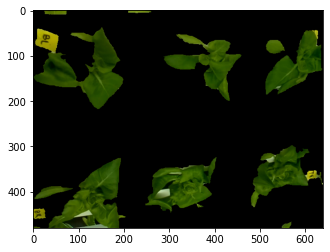

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#image of corrosion
eroded = cv2.erode(filledEdgesOut,kernel)
#-------------------------------------------------------------------------------

#Eliminate connected region
#-------------------------------------------------------------------------------
def baweraopen(image,size):
    output=image.copy()
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
    for i in range(1,nlabels-1):
        regions_size=stats[i,4]
        if regions_size<size:
            x0=stats[i,0]
            y0=stats[i,1]
            x1=stats[i,0]+stats[i,2]
            y1=stats[i,1]+stats[i,3]
            for row in range(y0,y1):
                for col in range(x0,x1):
                    if labels[row,col]==i:
                        output[row,col]=0
    return output
im2=baweraopen(eroded,180)#200 is the size of the connected region to be eliminated.
#---------------------------------------------------------------------------------

# Count the number of pixels in the plant
#---------------------------------------------------------------------------------
print("number of pixels in the plant:",len(im2.nonzero()[0]))
#distance is 50
distance_top=50
Area=(pow((0.000122*(distance_top-0.304)/0.304),2)*len(im2.nonzero()[0]))
print("leaf area:",round(Area, 2))
#---------------------------------------------------------------------------------

#show the new image.
#---------------------------------------------------------------------------------
img[:,:,0]=im2*r
img[:,:,1]=im2*g
img[:,:,2]=im2*b
plt.imshow((img * 255).astype(np.uint8))

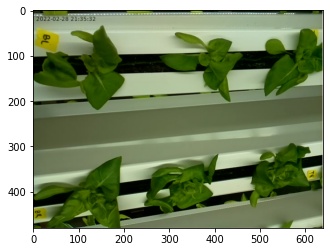

In [25]:
rgb_img = img[:,:,::-1]  # Converts from BGR to RGB since OpenCV uses BGR
plt.imshow(rgb_img)

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
# image = cv2.imread('data/2022-02-28_21-35-32_output.jpg')
image = cv2.imread('data/2022-02-23_06-08-12_output.jpg')

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMin', 'image', 36)
cv2.setTrackbarPos('SMin', 'image', 181)
cv2.setTrackbarPos('VMin', 'image', 0)
cv2.setTrackbarPos('HMax', 'image', 96)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# cv2.setTrackbarPos('HMax', 'image', 179)
# cv2.setTrackbarPos('SMax', 'image', 255)
# cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0



while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 36 , sMin = 181, vMin = 0), (hMax = 96 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 181, vMin = 0), (hMax = 79 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 181, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 196, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 147, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 117, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 140, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 90 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 117 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 73 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 73 , sMax = 209, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 73 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 73 , sMax = 255, vMax = 198)
(hMin = 36 , sMin = 185, vMin = 0), (hMax = 73 , s